In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
print(X.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [3]:
print(f'there are {pd.concat([X,y], axis=1).isnull().sum().sum()} missing values')

there are 0 missing values


Count of Malignant tumors 212
Count of Benign tumors 357


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



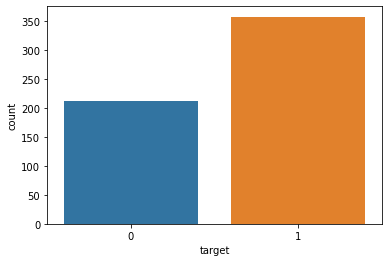

In [4]:
print(f'Count of Malignant tumors {y.value_counts()[0]}')
print(f'Count of Benign tumors {y.value_counts()[1]}')
ax = sns.countplot(y, label='Count')  
plt.show()

### Data preparation 

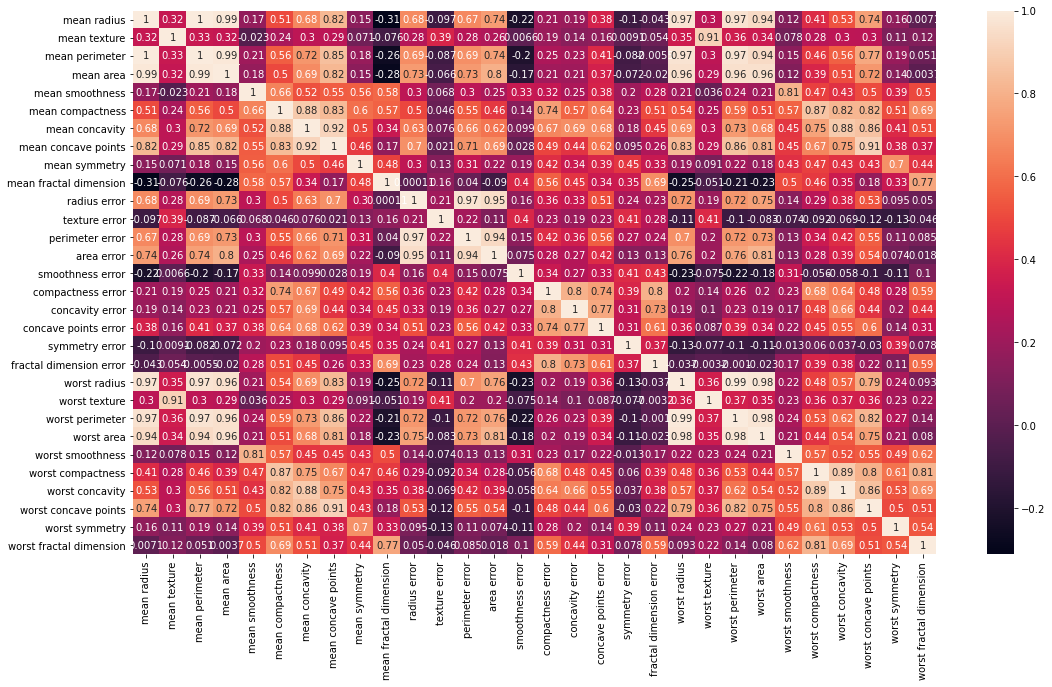

In [5]:
plt.figure(figsize=(18,10))
sns.heatmap(X.corr(),annot=True)
plt.show()

Removing highly correlated values

In [6]:
drop_list = ['mean perimeter','mean radius','mean compactness','mean concave points','radius error','perimeter error','compactness error','concave points error','worst radius','worst perimeter','worst compactness','worst concave points','worst texture','worst area']
X = X.drop(drop_list, axis=1)

In [8]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
print(f'The shape of Train data is {X_train.shape}')
print(f'The shape of Test data is {X_test.shape}')

The shape of Train data is (455, 16)
The shape of Test data is (114, 16)


#### Implementation of Decision trees

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion= "gini", max_depth=2)

In [11]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [12]:
y_test_pred = tree_clf.predict(X_test)

### Model Evaluation

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(f'The accuracy of the model is: {accuracy_score(y_test,y_test_pred)*100:0.2f}')

print('confusion matrix')
print(f'{confusion_matrix(y_test, y_test_pred)}')

The accuracy of the model is: 95.61
confusion matrix
[[40  3]
 [ 2 69]]
